In [1]:
import pandas as pd
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience



In [2]:
graph_db =  GraphDatabase.driver(uri = "bolt://localhost:7687", auth=("neo4j", "password"))

In [3]:
URI  = "bolt://localhost:7687"
creds=("neo4j", "password")

gds =  GraphDataScience(URI,auth=(creds ))



In [9]:
result = gds.run_cypher(
  """
    CALL gds.graph.drop('myGraph_1')
  """
)
display(result)

,graphName,database,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema
0,myGraph_1,neo4j,,-1,61,100,{'relationshipProjection': {'__ALL__': {'orien...,0.027322,2022-11-10T14:19:39.215204000+01:00,2022-11-10T14:19:39.226201200+01:00,"{'graphProperties': {}, 'relationships': {'__A..."


In [12]:
result = gds.run_cypher(
  """
CALL gds.graph.project('myGraph','*','*')
  """
)
display(result)

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'__ALL__': {'label': '*', 'properties': {}}}","{'__ALL__': {'orientation': 'NATURAL', 'aggreg...",myGraph,61,100,5


In [31]:
result = gds.run_cypher(
  """
MATCH (c:Room),(t:Tilluft_ventil)
RETURN c.rooms_volym AS Roomsvolym, c.name AS Rooms_namn
       
  """
)
display(result)

,Roomsvolym,Rooms_namn
0,6,Box1
1,6,Box1
2,6,Box1
3,6,Box1
4,6,Box1
...,...,...
271,70,Matsal
272,70,Matsal
273,70,Matsal
274,70,Matsal


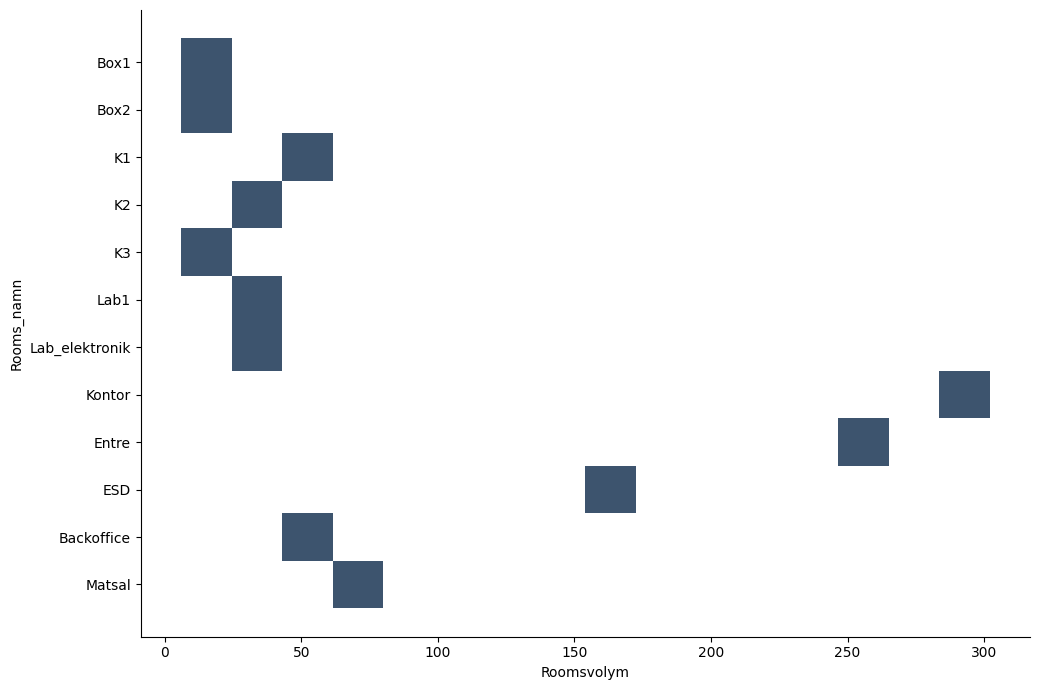

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=result, x="Roomsvolym", y="Rooms_namn", height=7, aspect=1.5)

In [37]:

result = gds.run_cypher(
"""
MATCH (n) RETURN n

"""
)
display(result)

,n
0,"(rums_volym, zon, name, class, room)"
1,"(rums_volym, zon, name, class, room)"
2,"(rums_volym, zon, name, class, room)"
3,"(rums_volym, name, zon, class, room)"
4,"(rums_volym, name, zon, class, room)"
...,...
56,"(rums_volym, zon, name, class, room)"
57,"(rums_volym, name, zon, class, room)"
58,"(rums_volym, name, zon, class, room)"
59,"(rums_volym, name, zon, class, room)"
